# 05 Data Analytics: Parametric Distributions
Professor Michael Pyrcz

## Binomial distribution

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

Exploration drilling failue rate is 70%. The company is drilling up 10 prospects.
What is the probability of only 3 successful discoveries

In [6]:
n = 10 # number of prospects
x = 3  # number of success in the n propects
p = 1 - 0.7 # probability drilling success

prob_succes = binom.pmf(x, n, p) # probability of x success in n 
mean, var = binom.stats(n, p)

print(f'prob_success = {prob_succes:0.3f}')
print(f'mean = {mean:0.3f}')
print(f'variance = {var:0.3f}')

prob_success = 0.267
mean = 3.000
variance = 2.100


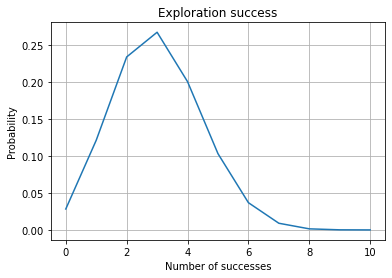

In [9]:
xs = range(11)
prob_success = [binom.pmf(x, n, p) for x in xs]
fig, ax = plt.subplots()
ax.plot(xs, prob_success)
ax.set(xlabel='Number of successes', ylabel='Probability',
       title='Exploration success')
ax.grid()
plt.show()    

## Poisson distribution

When drilling through a specific formation there have been an average of 3 loss incidents.<br>What is the probability of 5 flow los incidence for the next well?

In [11]:
from scipy.stats import poisson

In [14]:
mu = 3
x = 5
print(f'Probability = {poisson.pmf(x, mu):0.3f}')

Probability = 0.101


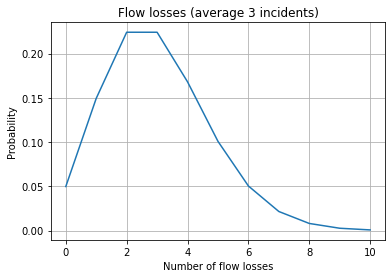

In [15]:
xs = range(11)
prob = [poisson.pmf(x, mu) for x in xs]
fig, ax = plt.subplots()
ax.plot(xs, prob)
ax.set(xlabel='Number of flow losses', ylabel='Probability',
       title=f'Flow losses (average {mu:n} incidents)')
ax.grid()
plt.show() 

## Normal or Gaussian distribution

In [2]:
from scipy.stats import norm
import numpy as np

In [3]:
porosity = (0.05, 0.07, 0.1, 0.12, 0.14, 0.14, 0.15, 0.19, 0.2, 0.23)

In [4]:
m = np.mean(porosity)
s = np.std(porosity)
prob = norm.cdf(0.18, loc=m, scale=s)

print(f'mean = {m:0.3f}')
print(f'sdev = {s:0.3f}')
print(f'prob <=0.18 = {prob:0.3f}')

mean = 0.139
sdev = 0.054
prob <=0.18 = 0.776


In [5]:
mu, s = norm.fit(porosity)
print(f'mean = {mu:0.3f}')
print(f'sdev = {s:0.3f}')

mean = 0.139
sdev = 0.054


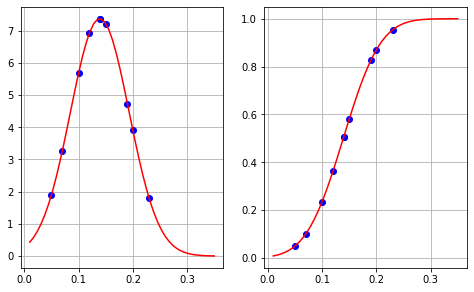

In [20]:
cdf1 = norm.cdf(porosity, loc=m, scale=s)
x2 = np.linspace(0.01, 0.35, 50)
cdf2 = norm.cdf(x2, loc=m, scale=s)

pdf1 = norm.pdf(porosity, loc=m, scale=s)
pdf2 = norm.pdf(x2, loc=m, scale=s)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.8))

ax1.plot(porosity, pdf1, 'o', color='blue')
ax1.plot(x2, pdf2, color='red')
ax1.grid()

ax2.plot(porosity, cdf1, 'o', color='blue')
ax2.plot(x2, cdf2, color='red')
ax2.grid()

## Lognormal distribution

In [22]:
from scipy.stats import lognorm

In [23]:
mean = 2.
sdev = 1.8
s = 0.954
x = 100

mu = np.exp(mean + sdev**2/2)
sigma = mu * np.sqrt(np.exp(sdev**2) - 1)

print(f'mu = {mu:0.2f}')
print(f'sigma = {sigma:0.2f}')
            
prob = lognorm.cdf(x, s, mean, sdev)
print(f'prob = {prob:0.2f}')

mu = 37.34
sigma = 184.94
prob = 1.00


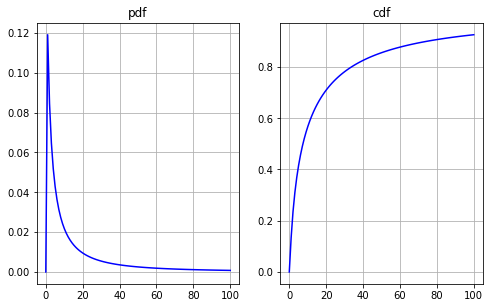

In [46]:
mean2 = 2.
sdev2 = 1.8

xs = np.linspace(0.0,100.0,100)
pdf = lognorm.pdf(xs, s=sdev2, scale=np.exp(mean2))
cdf = lognorm.cdf(xs, s=sdev2, scale=np.exp(mean2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.8))

ax1.set_title("pdf")
ax1.plot(xs, pdf, color='blue')
ax1.grid()

ax2.set_title("cdf")
ax2.plot(xs, cdf, color='blue')
ax2.grid()